# **Esercizio Machine Learning**

Utilizzando il dataset "Wine" disponibile in scikit-learn, sviluppa un modello di classificazione per prevedere la classe del vino basandoti sulle sue caratteristiche chimiche.

Esegui una ricerca degli iperparametri utilizzando GridSearchCV e valuta le prestazioni del modello utilizzando la validazione incrociata.

1. Carica il dataset "Wine" utilizzando sklearn.datasets.load_wine().

In [3]:
from sklearn.datasets import load_wine
data = load_wine()
X = data.data 
y = data.target

2. Esplora i dati per comprendere le caratteristiche e le classi presenti.

In [2]:
import pandas as pd

In [4]:
df=pd.DataFrame(X, columns=data.feature_names)
df['Target']=y

In [6]:
df.shape

(178, 14)

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [7]:
df['Target'].value_counts()

Target
1    71
0    59
2    48
Name: count, dtype: int64

3. Suddividi il dataset in set di training e test.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. Crea un modello di classificazione utilizzando RandomForestClassifier.

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model = RandomForestClassifier(n_estimators=100, max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

4. Definisci una griglia di iperparametri, ad esempio variando il numero di stimatori (n_estimators), la profondità massima (max_depth) e il criterio di qualità dello split (criterion).

In [14]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 2, 3],
    'criterion': ['gini', 'entropy']
}

5. Utilizza GridSearchCV per trovare la migliore combinazione di iperparametri, utilizzando una
validazione incrociata con 5 fold

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [20]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [21]:
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=cv,  # Usa StratifiedKFold per la cross-validation
    scoring='accuracy')

In [22]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [23]:
best_par = grid_search.best_params_
print(f"Migliori parametri: {best_par}")

Migliori parametri: {'criterion': 'gini', 'max_depth': 2, 'n_estimators': 100}


7. Dopo aver trovato i migliori iperparametri, addestra il modello ottimizzato sull'intero set
di training.

In [24]:
model = RandomForestClassifier(n_estimators=best_par["n_estimators"], max_depth=best_par["max_depth"], criterion=best_par["criterion"])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

8. Valuta le prestazioni del modello sul test set utilizzando metriche come l'accuratezza, la
precisione, il richiamo e l'F1-score.

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



9. Visualizza la matrice di confusione per analizzare in dettaglio le prestazioni del modello.

In [28]:
cm = confusion_matrix(y_test, y_pred)

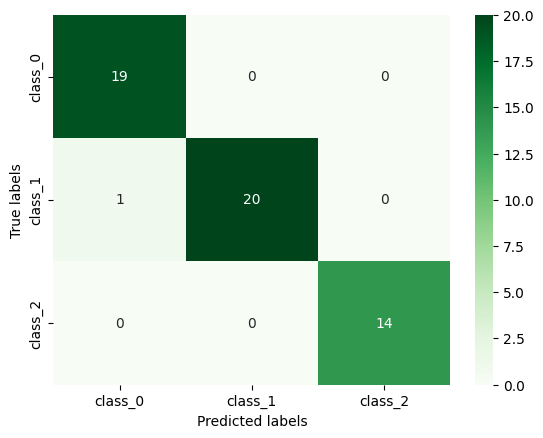

In [29]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()